<a href="https://colab.research.google.com/github/Viny2030/UNED/blob/main/practica02_input.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/NLP/1_Introduccion/Introduccion.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>

A-

In [ ]:
!pip install stanza

B-

In [ ]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

C-

In [ ]:
import stanza

# Descarga el pipeline para el español
stanza.download('en')

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: en (English) ...
INFO:stanza:File exists: /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources


D-

In [ ]:

# Carga el pipeline
nlp = stanza.Pipeline('en')

# Procesa una oración
doc = nlp("Jane bought me these books.\nJane bought a book for me.\nShe dropped a line to him. Thank you.\nShe sleeps.\nI sleep a lot.\nI was born in Madrid.\nthe cat was chased by the dog.\nI was born in Madrid during 1995.\nOut of all this , something good will come.\nSusan left after the rehearsal. She did it well.\nShe sleeps during the morning, but she sleeps.")

# Imprime el árbol de dependencias
print(doc.sentences[0].dependencies)




INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


[({
  "id": 2,
  "text": "bought",
  "lemma": "buy",
  "upos": "VERB",
  "xpos": "VBD",
  "feats": "Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin",
  "head": 0,
  "deprel": "root",
  "start_char": 5,
  "end_char": 11
}, 'nsubj', {
  "id": 1,
  "text": "Jane",
  "lemma": "Jane",
  "upos": "PROPN",
  "xpos": "NNP",
  "feats": "Number=Sing",
  "head": 2,
  "deprel": "nsubj",
  "start_char": 0,
  "end_char": 4
}), ({
  "id": 0,
  "text": "ROOT"
}, 'root', {
  "id": 2,
  "text": "bought",
  "lemma": "buy",
  "upos": "VERB",
  "xpos": "VBD",
  "feats": "Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin",
  "head": 0,
  "deprel": "root",
  "start_char": 5,
  "end_char": 11
}), ({
  "id": 2,
  "text": "bought",
  "lemma": "buy",
  "upos": "VERB",
  "xpos": "VBD",
  "feats": "Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin",
  "head": 0,
  "deprel": "root",
  "start_char": 5,
  "end_char": 11
}, 'iobj', {
  "id": 3,
  "text": "me",
  "lemma": "I",
  "upos": "PRON",
  "xpos": "

E-

In [ ]:
import stanza
import json

# Carga el pipeline
nlp = stanza.Pipeline('en')

# Procesa un texto
doc = nlp("""Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well.""")

# Crea una lista para almacenar los resultados
results = []

# Itera sobre cada oración en el documento
for sentence in doc.sentences:
    # Extrae las dependencias
    dependencies = sentence.dependencies

    # Convert dependencies to a list of dictionaries before adding to results
    dependencies_list = []
    for dep in dependencies:
        dependencies_list.append({
            'governor': dep[0].text if dep[0] else None,
            'relation': dep[1],
            'dependent': dep[2].text if dep[2] else None
        })

    # Crea un diccionario para representar la oración
    sentence_data = {
        'text': sentence.text,
        'dependencies': dependencies_list  # Use the converted list here
    }

    # Agrega el diccionario a la lista de resultados
    results.append(sentence_data)

# Escribe los resultados en un archivo JSON
with open('sentence_dependencies.json', 'w') as f:
    json.dump(results, f, indent=4)

print("Dependencias de las oraciones guardadas en 'sentence_dependencies.json'")

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


Dependencias de las oraciones guardadas en 'sentence_dependencies.json'


F-

In [ ]:
# Itera sobre las palabras de la oración
for sent in doc.sentences:
    for word in sent.words:
        print(f"Word: {word.text}\tLemma: {word.lemma}\tUPOS: {word.upos}\tXPOS: {word.xpos}\tFeatures: {word.feats}")

Word: Jane	Lemma: Jane	UPOS: PROPN	XPOS: NNP	Features: Number=Sing
Word: bought	Lemma: buy	UPOS: VERB	XPOS: VBD	Features: Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin
Word: me	Lemma: I	UPOS: PRON	XPOS: PRP	Features: Case=Acc|Number=Sing|Person=1|PronType=Prs
Word: these	Lemma: this	UPOS: DET	XPOS: DT	Features: Number=Plur|PronType=Dem
Word: books	Lemma: book	UPOS: NOUN	XPOS: NNS	Features: Number=Plur
Word: .	Lemma: .	UPOS: PUNCT	XPOS: .	Features: None
Word: Jane	Lemma: Jane	UPOS: PROPN	XPOS: NNP	Features: Number=Sing
Word: bought	Lemma: buy	UPOS: VERB	XPOS: VBD	Features: Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin
Word: a	Lemma: a	UPOS: DET	XPOS: DT	Features: Definite=Ind|PronType=Art
Word: book	Lemma: book	UPOS: NOUN	XPOS: NN	Features: Number=Sing
Word: for	Lemma: for	UPOS: ADP	XPOS: IN	Features: None
Word: me	Lemma: I	UPOS: PRON	XPOS: PRP	Features: Case=Acc|Number=Sing|Person=1|PronType=Prs
Word: .	Lemma: .	UPOS: PUNCT	XPOS: .	Features: None
Word: She	Lemma: she	UP

G-

In [ ]:
import stanza
import json

# Carga el pipeline
nlp = stanza.Pipeline('en')

# Procesa un texto
doc = nlp("""Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well.""")

# Crea una lista para almacenar los resultados
results = []

# Itera sobre las oraciones y palabras
for sent in doc.sentences:
    sentence_data = {'text': sent.text, 'words': []}
    for word in sent.words:
        word_data = {
            'text': word.text,
            'lemma': word.lemma,
            'upos': word.upos,
            'xpos': word.xpos,
            'feats': word.feats
        }
        sentence_data['words'].append(word_data)
    results.append(sentence_data)

# Escribe los resultados en un archivo JSON
with open('sentence_words.json', 'w') as f:
    json.dump(results, f, indent=4)

print("Información de palabras guardada en 'sentence_words.json'")


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


Información de palabras guardada en 'sentence_words.json'


H-

In [ ]:
doc = nlp("""Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well.""")
# Imprime los lemas
for sent in doc.sentences:
    for word in sent.words:
        print(f"Palabra: {word.text}\tLema: {word.lemma}")

Palabra: Jane	Lema: Jane
Palabra: bought	Lema: buy
Palabra: me	Lema: I
Palabra: these	Lema: this
Palabra: books	Lema: book
Palabra: .	Lema: .
Palabra: Jane	Lema: Jane
Palabra: bought	Lema: buy
Palabra: a	Lema: a
Palabra: book	Lema: book
Palabra: for	Lema: for
Palabra: me	Lema: I
Palabra: .	Lema: .
Palabra: She	Lema: she
Palabra: dropped	Lema: drop
Palabra: a	Lema: a
Palabra: line	Lema: line
Palabra: to	Lema: to
Palabra: him	Lema: he
Palabra: .	Lema: .
Palabra: Thank	Lema: thank
Palabra: you	Lema: you
Palabra: .	Lema: .
Palabra: She	Lema: she
Palabra: sleeps	Lema: sleep
Palabra: .	Lema: .
Palabra: I	Lema: I
Palabra: sleep	Lema: sleep
Palabra: a	Lema: a
Palabra: lot	Lema: lot
Palabra: .	Lema: .
Palabra: I	Lema: I
Palabra: was	Lema: be
Palabra: born	Lema: bear
Palabra: in	Lema: in
Palabra: Madrid	Lema: Madrid
Palabra: .	Lema: .
Palabra: the	Lema: the
Palabra: cat	Lema: cat
Palabra: was	Lema: be
Palabra: chased	Lema: chase
Palabra: by	Lema: by
Palabra: the	Lema: the
Palabra: dog	Lema: dog


I-

In [ ]:
import stanza
import json

# Carga el pipeline
nlp = stanza.Pipeline('es')  # Cambia 'en' por 'es' para español

# Procesa un texto
doc = nlp("""Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well.""")

# Crea una lista para almacenar los resultados
results = []

# Itera sobre las oraciones y palabras
for sent in doc.sentences:
    sentence_data = {'text': sent.text, 'lemmas': []}
    for word in sent.words:
        sentence_data['lemmas'].append(word.lemma)
    results.append(sentence_data)

# Escribe los resultados en un archivo JSON
with open('sentence_lemmas_es.json', 'w') as f:
    json.dump(results, f, indent=4)

print("Lemas de las palabras guardadas en 'sentence_lemmas_es.json'")

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: es (Spanish):
| Processor    | Package           |
------------------------------------
| tokenize     | combined          |
| mwt          | combined          |
| pos          | combined_charlm   |
| lemma        | combined_nocharlm |
| constituency | combined_charlm   |
| depparse     | combined_charlm   |
| sentiment    | tass2020_charlm   |
| ner          | conll02           |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


Lemas de las palabras guardadas en 'sentence_lemmas_es.json'


J-

In [ ]:
doc = nlp("""Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well.""")
# Imprime el árbol de dependencias
print(doc.sentences[0].dependencies)

[({
  "id": 0,
  "text": "ROOT"
}, 'root', {
  "id": 1,
  "text": "Jane",
  "lemma": "jane",
  "upos": "PROPN",
  "xpos": "np00000",
  "head": 0,
  "deprel": "root",
  "start_char": 0,
  "end_char": 4
}), ({
  "id": 1,
  "text": "Jane",
  "lemma": "jane",
  "upos": "PROPN",
  "xpos": "np00000",
  "head": 0,
  "deprel": "root",
  "start_char": 0,
  "end_char": 4
}, 'flat', {
  "id": 2,
  "text": "bought",
  "lemma": "bought",
  "upos": "PROPN",
  "head": 1,
  "deprel": "flat",
  "start_char": 5,
  "end_char": 11
}), ({
  "id": 1,
  "text": "Jane",
  "lemma": "jane",
  "upos": "PROPN",
  "xpos": "np00000",
  "head": 0,
  "deprel": "root",
  "start_char": 0,
  "end_char": 4
}, 'flat', {
  "id": 3,
  "text": "me",
  "lemma": "yo",
  "upos": "PRON",
  "feats": "Case=Acc|Number=Sing|Person=1|PrepCase=Npr|PronType=Prs",
  "head": 1,
  "deprel": "flat",
  "start_char": 12,
  "end_char": 14
}), ({
  "id": 1,
  "text": "Jane",
  "lemma": "jane",
  "upos": "PROPN",
  "xpos": "np00000",
  "head": 

K-

In [ ]:
import stanza
import json

# Carga el pipeline
nlp = stanza.Pipeline('en')

# Procesa el texto
doc = nlp("""Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well.""")

# Crea una lista para almacenar los resultados
results = []

# Itera sobre cada oración en el documento
for sentence in doc.sentences:
    # Extrae las dependencias
    dependencies = sentence.dependencies

    # Convert dependencies to a list of dictionaries before adding to results
    dependencies_list = []
    for dep in dependencies:
        dependencies_list.append({
            'governor': dep[0].text if dep[0] else None,
            'relation': dep[1],
            'dependent': dep[2].text if dep[2] else None
        })

    # Crea un diccionario para representar la oración
    sentence_data = {
        'text': sentence.text,
        'dependencies': dependencies_list  # Use the converted list here
    }

    # Agrega el diccionario a la lista de resultados
    results.append(sentence_data)

# Escribe los resultados en un archivo JSON
with open('sentence_dependencies.json', 'w') as f:
    json.dump(results, f, indent=4)

print("Dependencias de las oraciones guardadas en 'sentence_dependencies.json'")

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


Dependencias de las oraciones guardadas en 'sentence_dependencies.json'


L-

In [ ]:
# Procesa el texto
doc = nlp("""Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well.""")
# Imprime las etiquetas morfosintácticas
for sent in doc.sentences:
    for word in sent.words:
        print(f"Palabra: {word.text}\tEtiqueta: {word.upos}\tCaracterísticas: {word.feats}")

Palabra: Jane	Etiqueta: PROPN	Características: Number=Sing
Palabra: bought	Etiqueta: VERB	Características: Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin
Palabra: me	Etiqueta: PRON	Características: Case=Acc|Number=Sing|Person=1|PronType=Prs
Palabra: these	Etiqueta: DET	Características: Number=Plur|PronType=Dem
Palabra: books	Etiqueta: NOUN	Características: Number=Plur
Palabra: .	Etiqueta: PUNCT	Características: None
Palabra: Jane	Etiqueta: PROPN	Características: Number=Sing
Palabra: bought	Etiqueta: VERB	Características: Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin
Palabra: a	Etiqueta: DET	Características: Definite=Ind|PronType=Art
Palabra: book	Etiqueta: NOUN	Características: Number=Sing
Palabra: for	Etiqueta: ADP	Características: None
Palabra: me	Etiqueta: PRON	Características: Case=Acc|Number=Sing|Person=1|PronType=Prs
Palabra: .	Etiqueta: PUNCT	Características: None
Palabra: She	Etiqueta: PRON	Características: Case=Nom|Gender=Fem|Number=Sing|Person=3|PronType=Prs
Pa

M-

In [ ]:
import stanza
import json

# Carga el pipeline
nlp = stanza.Pipeline('en')

# Procesa el texto
doc = nlp("""Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well.""")

# Crea una lista para almacenar los resultados
results = []

# Itera sobre las oraciones y palabras
for sent in doc.sentences:
    sentence_data = {'text': sent.text, 'words': []}
    for word in sent.words:
        word_data = {
            'text': word.text,
            'upos': word.upos,
            'feats': word.feats
        }
        sentence_data['words'].append(word_data)
    results.append(sentence_data)

# Escribe los resultados en un archivo JSON
with open('sentence_words_pos.json', 'w') as f:
    json.dump(results, f, indent=4)

print("Etiquetas morfosintácticas guardadas en 'sentence_words_pos.json'")

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


Etiquetas morfosintácticas guardadas en 'sentence_words_pos.json'


N-

In [ ]:
import stanza
import networkx as nx
import matplotlib.pyplot as plt

Ñ-

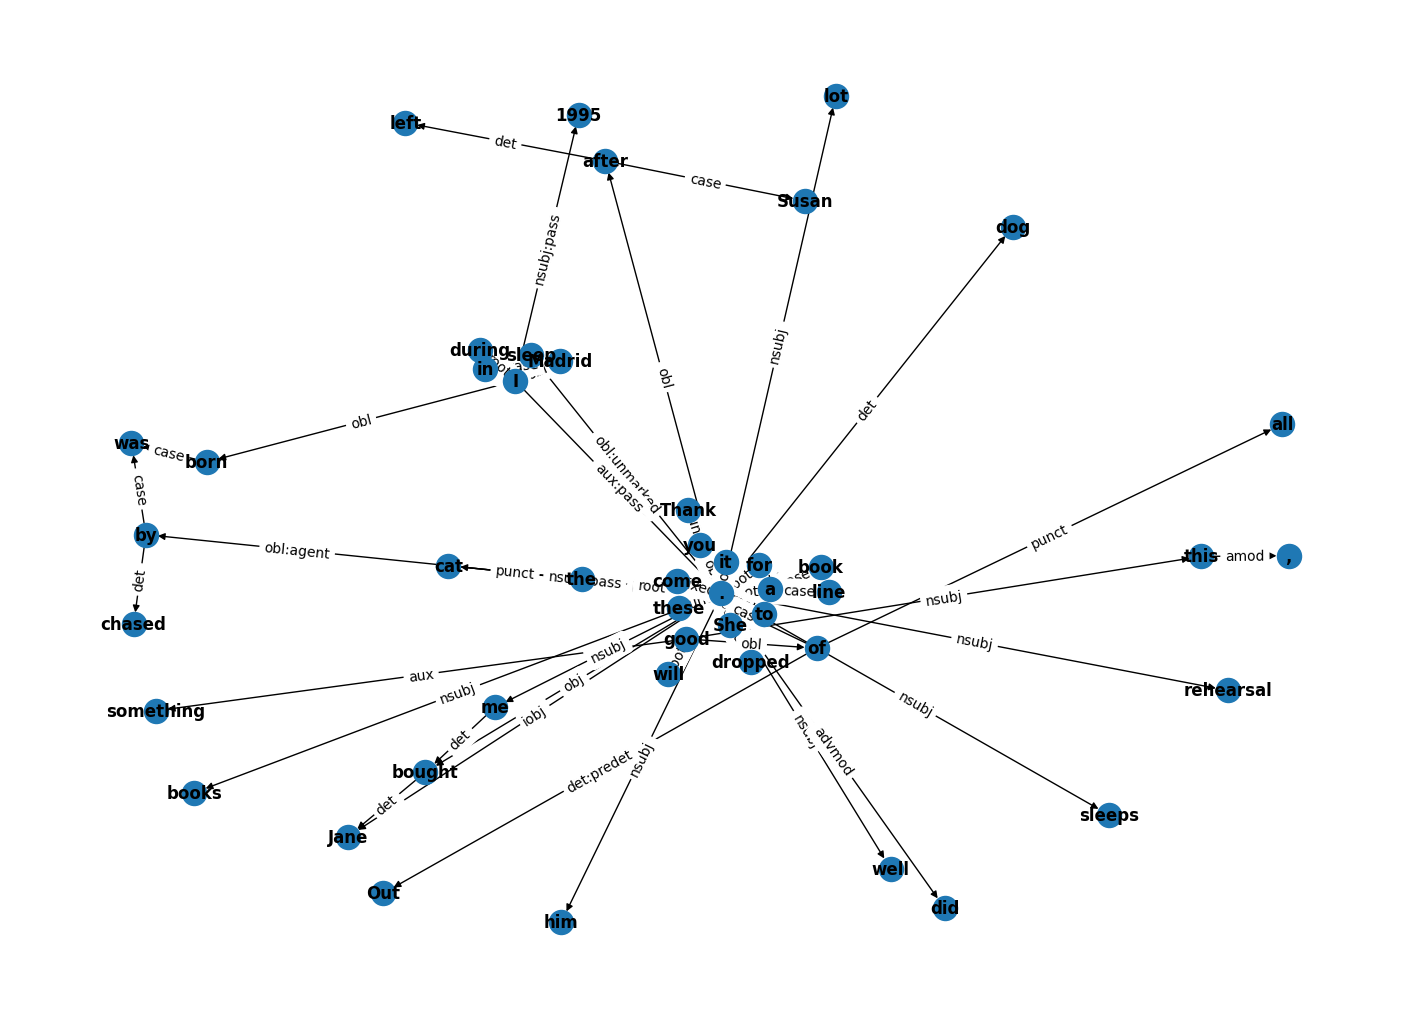

In [ ]:
# Crea un grafo vacío
G = nx.DiGraph()

# Agrega los nodos (palabras) al grafo
for sent in doc.sentences:
    for word in sent.words:
        G.add_node(word.text)
# Agrega las aristas (relaciones) al grafo
for sent in doc.sentences:
    for dep in sent.dependencies:
        # dep[0].id is the index of the governor (head) in the sentence, starting at 1
        # We need to subtract 1 to get the correct index in the list sent.words
        head = sent.words[dep[0].id - 3].text
        # Similar for the dependent word
        dep_word = sent.words[dep[2].id - 3].text
        rel = dep[1]  # dep[1] is the dependency type
        G.add_edge(head, dep_word, label=rel)


# Dibuja el grafo
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold')
labels = nx.get_edge_attributes(G,'label')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

plt.show()

O-

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


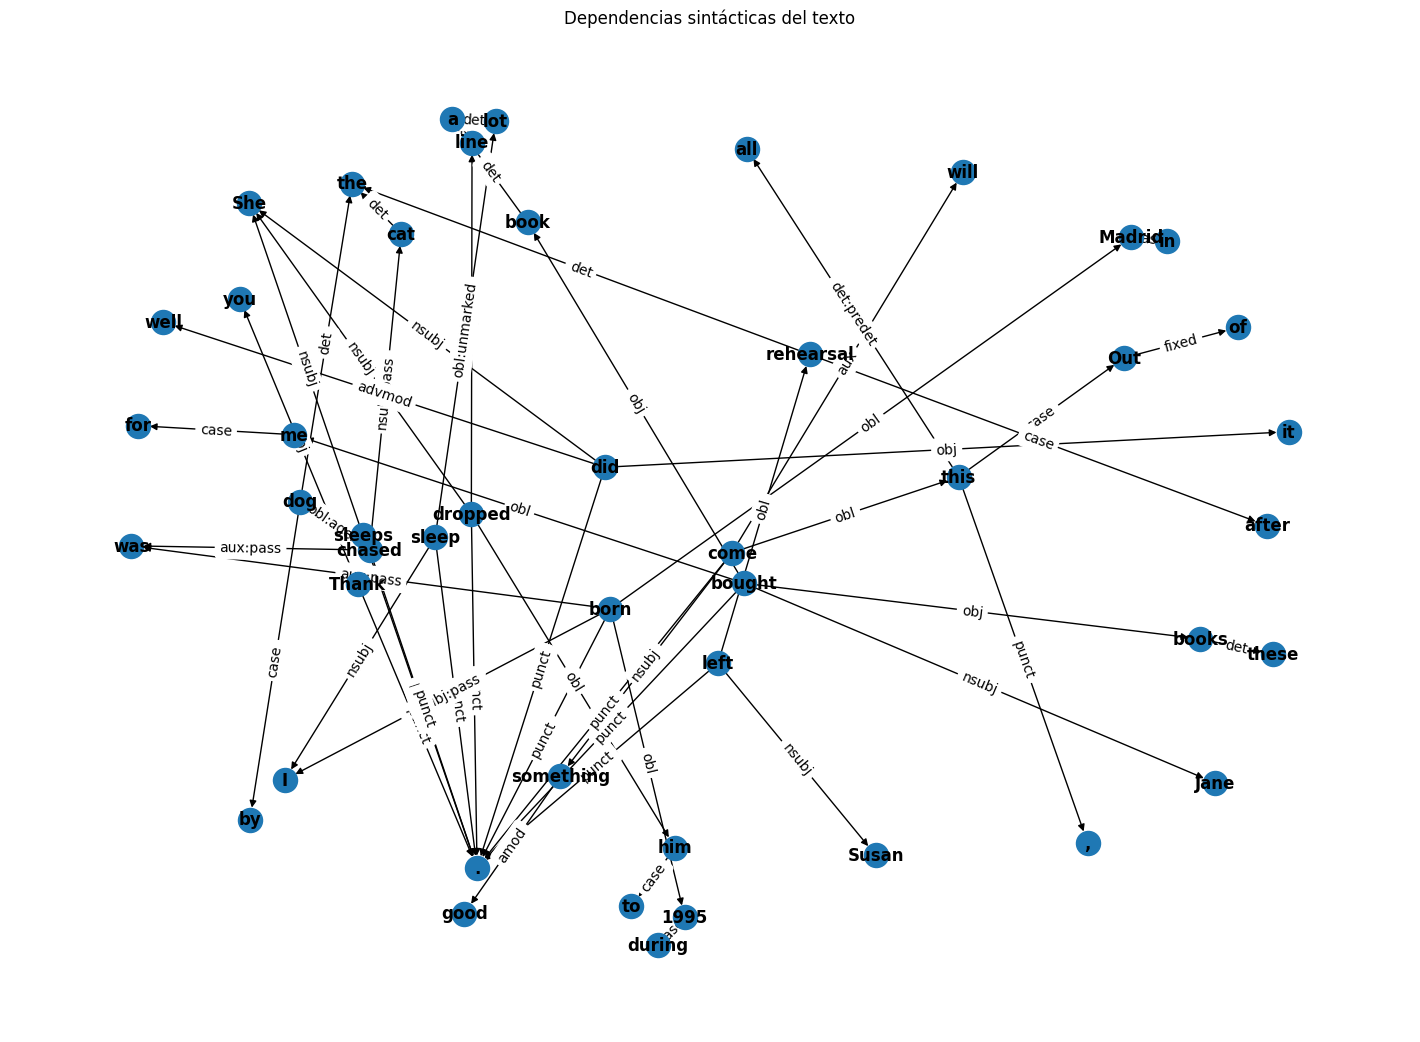

In [ ]:
import stanza
import networkx as nx
import matplotlib.pyplot as plt

# Carga el pipeline
nlp = stanza.Pipeline('en')

# Procesa el texto
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""

doc = nlp(text)

# Crea un grafo dirigido vacío
G = nx.DiGraph()

# Agrega los nodos (palabras) al grafo
for sent in doc.sentences:
    for word in sent.words:
        G.add_node(word.text)

# Agrega las aristas (relaciones) al grafo
for sent in doc.sentences:
    for dep in sent.dependencies:
        # Corrección de índice (resta 1 para alinear con el índice de lista)
        governor_index = dep[0].id - 1
        dependent_index = dep[2].id - 1

        # Verifica si los índices están dentro del rango de palabras de la oración
        if 0 <= governor_index < len(sent.words) and 0 <= dependent_index < len(sent.words):
            governor = sent.words[governor_index].text
            dependent = sent.words[dependent_index].text
            relation = dep[1]

            G.add_edge(governor, dependent, label=relation)

# Dibuja el grafo
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G)  # Posicionamiento automático
nx.draw(G, pos, with_labels=True, font_weight='bold')  # Dibuja nodos y etiquetas

# Extrae etiquetas de aristas y dibuja
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)  # Dibuja etiquetas de relación

plt.title("Dependencias sintácticas del texto")  # Titulo para el grafo
plt.show()

P-

In [ ]:
import json
import networkx as nx
import stanza

# Load the pipeline and process the text
nlp = stanza.Pipeline('en')
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""
doc = nlp(text)

# Create the graph
G = nx.DiGraph()
for sent in doc.sentences:
    for word in sent.words:
        G.add_node(word.text)
    for dep in sent.dependencies:
        governor_index = dep[0].id - 1
        dependent_index = dep[2].id - 1
        if 0 <= governor_index < len(sent.words) and 0 <= dependent_index < len(sent.words):
            governor = sent.words[governor_index].text
            dependent = sent.words[dependent_index].text
            relation = dep[1]
            # Add edge with label as an attribute
            G.add_edge(governor, dependent, label=relation)

# Prepare data for JSON
graph_data = {"nodes": [], "edges": []}
for node in G.nodes():
    graph_data["nodes"].append({"text": node})
for u, v, data in G.edges(data=True): # Iterate through edges with data
    graph_data["edges"].append({"source": u, "target": v, "label": data['label']}) # Access label from data

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


Q-

In [ ]:
# Write to JSON file
with open("dependency_graph.json", "w") as f:
    json.dump(graph_data, f, indent=4)  # Indent for readability

R-

<ipython-input-73-4e9155adccfe>:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


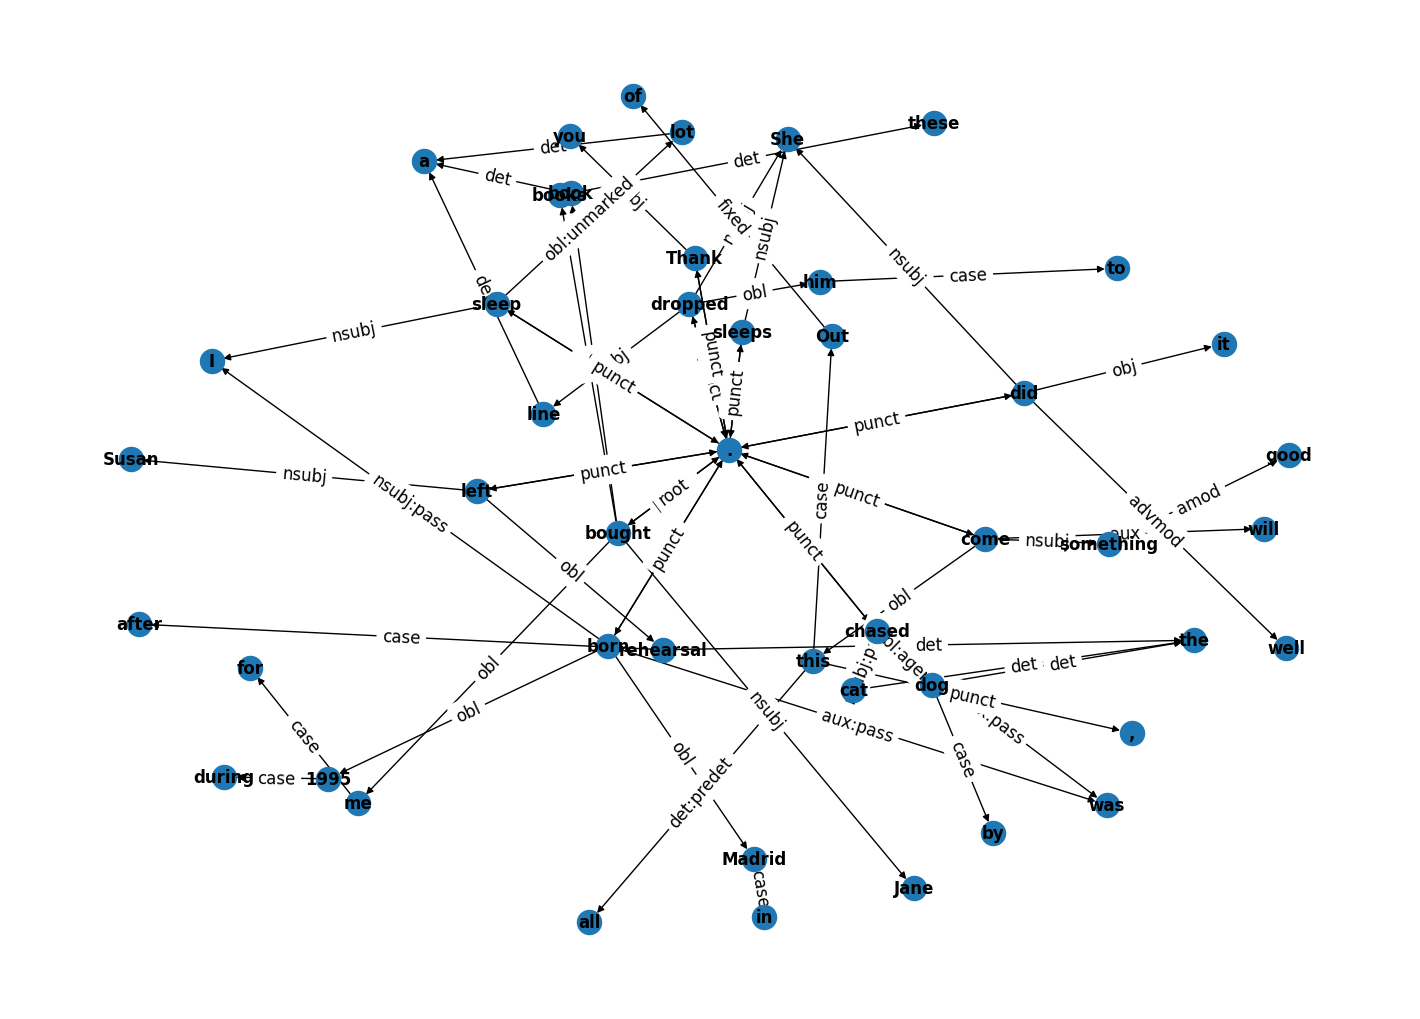

In [ ]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes (words) to the graph
for sent in doc.sentences:
    for word in sent.words:
        G.add_node(word.text)

# Add edges (relationships) to the graph, handling potential index errors
for sent in doc.sentences:
    for dep in sent.dependencies:
        try:
            head_index = dep[0].id - 1  # Get the head index (governor)
            dep_index = dep[2].id - 1  # Get the dependent word index
            head = sent.words[head_index].text
            dep_word = sent.words[dep_index].text
            rel = dep[1]  # Dependency type
            G.add_edge(head, dep_word, label=rel)
        except IndexError:
            print(f"Index error encountered for dependency: {dep}")
            # Handle index errors gracefully (e.g., log, skip dependency)

# Choose a layout for the graph (experiment with different layouts)
pos = nx.spring_layout(G, k=0.5)  # Adjust 'k' for node spacing

# Increase figure size for a larger plot
plt.figure(figsize=(14, 10))  # Adjust width and height as needed
# Draw the graph with labels and edge labels
nx.draw(G, pos, with_labels=True, font_weight='bold', font_family='sans-serif') # Changed 'fontfamily' to 'font_family'
nx.draw_networkx_edge_labels(G, pos, edge_labels=dict((k, v) for k, v in nx.get_edge_attributes(G, 'label').items()), font_size=12)

# Customize node and edge styles (optional)
# nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
# nx.set_edgecolor(G, 'gray')

# Show the plot
plt.axis('off')  # Hide axes for cleaner visualization
plt.tight_layout()
plt.show()

S-

In [ ]:
import json
import networkx as nx
import stanza

# Load the pipeline and process the text (same as previous code)
nlp = stanza.Pipeline('en')
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""  # Your text here
doc = nlp(text)

# Create the graph (same as previous code)
G = nx.DiGraph()
# ... (code to create the graph)

# Prepare data for JSON
graph_data = {"nodes": [], "edges": []}
for node in G.nodes():
    graph_data["nodes"].append({"text": node})
for edge in G.edges():
    source, target, label = edge
    graph_data["edges"].append({"source": source, "target": target, "label": label})


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


S-

In [ ]:
# Write to JSON file
with open("dependency_graph1.json", "w") as f:
    json.dump(graph_data, f, indent=4)  # Indent for readability

T-

In [ ]:
!pip install textblob

U-

In [ ]:
import stanza
import networkx as nx
import matplotlib.pyplot as plt
from textblob import TextBlob # Import TextBlob for sentiment analysis
nlp = stanza.Pipeline('en')
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""
doc = nlp(text)

# Perform sentiment analysis using TextBlob
text_content = " ".join([sentence.text for sentence in doc.sentences]) # Extract the text from the stanza Document
blob = TextBlob(text_content) # Create a TextBlob object
sentiment = blob.sentiment # Get the sentiment

print(f"Polarity: {sentiment.polarity}, Subjectivity: {sentiment.subjectivity}") # Access polarity and subjectivity


# Obtener las entidades nombradas (Named Entity Recognition using stanza)
for ent in doc.ents:
    print(ent.text, ent.type)

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


Polarity: 0.35, Subjectivity: 0.30000000000000004
Jane PERSON
Jane PERSON
Madrid GPE
Madrid GPE
1995 DATE
Susan PERSON


V-

In [ ]:
import stanza
import json

# Load the pipeline
nlp = stanza.Pipeline('en')

# Process the text
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""
doc = nlp(text)

# Create a list to store sentence data
sentences = []

# Iterate through each sentence in the document
for sentence in doc.sentences:
    # Create a dictionary to store sentence information
    sentence_data = {
        "text": sentence.text,
        "words": []
    }

    # Iterate through each word in the sentence
    for word in sentence.words:
        word_data = {
            "text": word.text,
            "lemma": word.lemma,
            "upos": word.upos,
            "xpos": word.xpos,
            "feats": word.feats
        }
        sentence_data["words"].append(word_data)

    sentences.append(sentence_data)

# Write the sentence data to a JSON file
with open("sentence_data.json", "w") as f:
    json.dump(sentences, f, indent=4)

print("Sentence data written to sentence_data.json")


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


Sentence data written to sentence_data.json


W-

In [ ]:
import stanza

def analizar_proposiciones(sentence):
    nlp = stanza.Pipeline('es')  # Carga el pipeline de Stanza para español
    doc = nlp(sentence)
    proposiciones = []
    for sent in doc.sentences:
        proposicion_normalizada = sent.text.lower()  # Ejemplo simple: Convertir a minúsculas
        proposiciones.append(proposicion_normalizada)
    return proposiciones

sentence = "Jane bought me these books.\nJane bought a book for me.\nShe dropped a line to him. Thank you.\nShe sleeps.\nI sleep a lot.\nI was born in Madrid.\nthe cat was chased by the dog.\nI was born in Madrid during 1995.\nOut of all this , something good will come.\nSusan left after the rehearsal. She did it well.\nShe sleeps during the morning, but she sleeps."

proposiciones_result = analizar_proposiciones(sentence)
print(proposiciones_result)

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: es (Spanish):
| Processor    | Package           |
------------------------------------
| tokenize     | combined          |
| mwt          | combined          |
| pos          | combined_charlm   |
| lemma        | combined_nocharlm |
| constituency | combined_charlm   |
| depparse     | combined_charlm   |
| sentiment    | tass2020_charlm   |
| ner          | conll02           |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


['jane bought me these books.', 'jane bought a book for me.', 'she dropped a line to him.', 'thank you.', 'she sleeps.', 'i sleep a lot.', 'i was born in madrid.', 'the cat was chased by the dog.', 'i was born in madrid during 1995.', 'out of all this , something good will come.', 'susan left after the rehearsal.', 'she did it well.', 'she sleeps during the morning, but she sleeps.']


X-

In [ ]:
# Guardar las proposiciones en un archivo JSON
with open("proposiciones.json", "w") as outfile:
    json.dump(proposiciones_result, outfile)

print("Proposiciones guardadas en proposiciones.json")

Proposiciones guardadas en proposiciones.json


Y-

In [ ]:
import stanza

nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')
doc = nlp("Jane bought me these books.\nJane bought a book for me.\nShe dropped a line to him. Thank you.\nShe sleeps.\nI sleep a lot.\nI was born in Madrid.\nthe cat was chased by the dog.\nI was born in Madrid during 1995.\nOut of all this , something good will come.\nSusan left after the rehearsal. She did it well.\nShe sleeps during the morning, but she sleeps." )

# Accediendo a las dependencias de la palabra "line"
for sentence in doc.sentences:
    for word in sentence.words:
        if word.text == "line":
            print(f"Word: {word.text}, Head: {sentence.words[word.head-1].text}, DepRel: {word.deprel}")

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


Word: line, Head: dropped, DepRel: obj


Z-

In [ ]:
import stanza
import json

nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well.
She sleeps during the morning, but she sleeps."""
doc = nlp(text)

# Crear una lista para almacenar los resultados
dependencies = []

# Iterar sobre cada oración en el documento
for sentence in doc.sentences:
    sentence_deps = []
    for word in sentence.words:
        # Crear un diccionario para representar la dependencia de cada palabra
        word_dep = {
            "word": word.text,
            "head": sentence.words[word.head - 1].text if word.head > 0 else "ROOT",
            "deprel": word.deprel
        }
        sentence_deps.append(word_dep)
    dependencies.append(sentence_deps)

# Escribir los resultados en un archivo JSON
with open("sentence_dependencies.json", "w") as f:
    json.dump(dependencies, f, indent=4)

print("Dependencias de las oraciones guardadas en 'sentence_dependencies.json'")

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


Dependencias de las oraciones guardadas en 'sentence_dependencies.json'


AA-

In [ ]:
import stanza
import json

def extract_nvn_propositions(text):
    """
    Extracts subject-verb-object propositions from an English text.

    Args:
        text: The input text.

    Returns:
        A list of extracted NVN propositions.
    """

    nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')
    doc = nlp("Jane bought me these books.\nJane bought a book for me.\nShe dropped a line to him. Thank you.\nShe sleeps.\nI sleep a lot.\nI was born in Madrid.\nthe cat was chased by the dog.\nI was born in Madrid during 1995.\nOut of all this , something good will come.\nSusan left after the rehearsal. She did it well.\nShe sleeps during the morning, but she sleeps.")
    nvn_propositions = []

    # Agregar un contador para verificar si se encontraron proposiciones
    # Note: This num_propositions counter is never actually used in the original code logic.
    #       If you want to count propositions, you'll need to increment it inside the loop where propositions are added.
    num_propositions = 0

    for sentence in doc.sentences:
        for word in sentence.words:
            if word.deprel == 'nsubj':  # Check if the word is a nominal subject
                subject = word.text
                for line in sentence.words:
                    if line.head == word.id and (line.deprel == 'obj' or line.deprel == 'dobj'):
                        # Check if the current word is a child of the subject and has the correct dependency relation
                        object = line.text
                        for head in sentence.words:
                            if head.head == 0:  # Find the root (main verb)
                                verb = head.text
                                nvn_propositions.append(f"{subject} {verb} {object}")
                                # If you want to count propositions, increment the counter here:
                                # num_propositions += 1
                                break

    # Move the file writing and printing logic outside the inner function
    if num_propositions == 0: # (but keep in mind, it's currently always 0)
        print("No se encontraron proposiciones NVN en el texto.")
    else:
        with open("dependencies.json", "w") as outfile:
            json.dump(nvn_propositions, outfile, indent=4)
        print(f"Se encontraron {num_propositions} proposiciones y se guardaron en dependencies.json")

    return nvn_propositions # Return the propositions


# Example usage with the provided sentence
text = """
Jane bought me these books.
Jane bought a book for me.
She dropped a line to him.
Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal.
She did it well.
She sleeps during the morning, but she sleeps.
"""
propositions = extract_nvn_propositions(text)
print(propositions)

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


No se encontraron proposiciones NVN en el texto.
[]


BB-

In [ ]:
import stanza
import json

def extract_nvn_propositions(text):
  """
  Extracts subject-verb-object propositions from an English text.

  Args:
      text: The input text.

  Returns:
      A list of dictionaries representing the extracted NVN propositions.
  """

  nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')
  doc = nlp(text)

  propositions = []
  for sentence in doc.sentences:
    for word in sentence.words:
      if word.deprel == 'nsubj':  # Check if the word is a nominal subject
        subject = word.text
        for line in sentence.words:
          if line.head == word.id and (line.deprel == 'obj' or line.deprel == 'dobj'):
            # Check for subject's child with object dependency
            object = line.text
            for head in sentence.words:
              if head.head == 0:  # Find the root (main verb)
                verb = head.text
                proposition = {
                    "subject": subject,
                    "verb": verb,
                    "object": object
                }
                propositions.append(proposition)
                break  # Move on to the next sentence after finding a proposition

  return propositions

# Example usage with the provided sentence
text = """
Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well.
She sleeps during the morning, but she sleeps.
"""
propositions = extract_nvn_propositions(text)

# Write propositions to JSON file
with open("nvn_propositions.json", "w") as f:
  json.dump(propositions, f, indent=4)

print("NVN propositions written to 'nvn_propositions.json'")

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


NVN propositions written to 'nvn_propositions.json'


CC-

In [ ]:
import stanza

def extract_nv_propositions(text):
    """
    Extrae proposiciones sujeto-verbo de un texto en inglés.

    Args:
        text: El texto de entrada.

    Returns:
        Una lista de proposiciones NV.
    """

    nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')
    doc = nlp( "Jane bought me these books.\nJane bought a book for me.\nShe dropped a line to him. Thank you.\nShe sleeps.\nI sleep a lot.\nI was born in Madrid.\nthe cat was chased by the dog.\nI was born in Madrid during 1995.\nOut of all this , something good will come.\nSusan left after the rehearsal. She did it well.\nShe sleeps during the morning, but she sleeps.")
    nv_propositions = []

    for sentence in doc.sentences:
        for word in sentence.words:
            if word.deprel == 'nsubj':  # Verificamos si la palabra es un sujeto nominal
                subject = word.text
                for head in sentence.words:
                    if head.head == 0:  # Encontramos el verbo principal
                        verb = head.text
                        nv_propositions.append(f"{subject} {verb}")
                        break

    return nv_propositions

# Ejemplo de uso
text = ( "Jane bought me these books.\nJane bought a book for me.\nShe dropped a line to him. Thank you.\nShe sleeps.\nI sleep a lot.\nI was born in Madrid.\nthe cat was chased by the dog.\nI was born in Madrid during 1995.\nOut of all this , something good will come.\nSusan left after the rehearsal. She did it well.\nShe sleeps during the morning, but she sleeps.")
propositions = extract_nv_propositions(text)
print(propositions)

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


['Jane bought', 'Jane bought', 'She dropped', 'She sleeps', 'I sleep', 'something come', 'Susan left', 'She did', 'She sleeps', 'she sleeps']
